# Week 8: Anime Faces Image Clustering with K-Means

In [1]:
%pip install torch torchvision
%pip install ipykernel
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Import Libraries

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import random
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

# Introduction

In [3]:
print("Exercise: Image Clustering of Anime Characters - Using MobileNetV2")
print("Objective: To explore and compare clustering results using 50, 500, and 1000 anime character images with MobileNetV2 features.")

Exercise: Image Clustering of Anime Characters - Using MobileNetV2
Objective: To explore and compare clustering results using 50, 500, and 1000 anime character images with MobileNetV2 features.


# Load MobileNetV2 Model

In [4]:
base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')


/var/folders/9c/fl5dfhzx5v719gyq_ckc2d8c0000gn/T/ipykernel_66434/1265401365.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')


# Load Images Function

In [5]:
image_folder = '/Users/maylineamegan/Downloads/Anime Faces'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]
random.shuffle(image_files)

def load_images(num_images):
    images = []
    for file in image_files[:num_images]:
        img = cv2.imread(os.path.join(image_folder, file))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (224, 224))  # Resize for MobileNetV2
            images.append(img)
    return images

def display_sample_images(images, num_samples=6):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    for i, ax in enumerate(axes.flat):
        if i < min(num_samples, len(images)):
            ax.imshow(images[i])
            ax.axis('off')
    plt.tight_layout()
    plt.show()

def extract_features(images):
    preprocessed_images = preprocess_input(np.array(images))
    features = base_model.predict(preprocessed_images)
    return features

def perform_clustering(features, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    return kmeans.fit_predict(features)

def visualize_clusters(tsne_result, labels):
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis')
    plt.colorbar(scatter)
    plt.title('Clusters Visualized in t-SNE Space')
    plt.show()

def process_dataset(num_images):
    print(f"\n## Processing {num_images} images ##")
    
    images = load_images(num_images)
    print(f"Successfully loaded {len(images)} images")
    
    print("Displaying sample images:")
    display_sample_images(images)
    
    print("Extracting features using MobileNetV2...")
    features = extract_features(images)
    
    print("Performing PCA...")
    pca = PCA(n_components=50)
    pca_result = pca.fit_transform(features)
    
    print("Performing t-SNE...")
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(features)
    
    print("Clustering...")
    labels = perform_clustering(features)
    
    print("Visualizing clusters:")
    visualize_clusters(tsne_result, labels)
    
    silhouette_avg = silhouette_score(features, labels)
    print(f"The average silhouette score is: {silhouette_avg:.4f}")
    
    return silhouette_avg

# Display Sample Images Function

In [6]:
def display_sample_images(images, num_samples=6):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    for i, ax in enumerate(axes.flat):
        if i < min(num_samples, len(images)):
            ax.imshow(images[i])
            ax.axis('off')
    plt.tight_layout()
    plt.show()

def display_sample_images(images, num_samples=6):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    for i, ax in enumerate(axes.flat):
        if i < min(num_samples, len(images)):
            ax.imshow(images[i])
            ax.axis('off')
    plt.tight_layout()
    plt.show()

# Feature Exraction Function

In [7]:
# Load images
image_folder = '/Users/maylineamegan/Downloads/Anime Faces'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]
random.shuffle(image_files)  # Shuffle to ensure random selection

def load_images(num_images):
    images = []
    for file in image_files[:num_images]:
        img = cv2.imread(os.path.join(image_folder, file))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
    return images


# Clustering Function

In [8]:
def perform_clustering(features, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    return kmeans.fit_predict(features)

# Visualisation Function

In [9]:
def visualize_clusters(tsne_result, labels):
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis')
    plt.colorbar(scatter)
    plt.title('Clusters Visualized in t-SNE Space')
    plt.show()

In [10]:
def examine_clusters(images, features, labels, n_clusters):
    print(f"\n## Examining {n_clusters} Clusters ##")
    
    # Get cluster sizes
    cluster_sizes = [sum(labels == i) for i in range(n_clusters)]
    print("Cluster sizes:", cluster_sizes)
    
    # Get and plot cluster representatives
    representatives = get_cluster_representatives(images, labels, n_clusters)
    plot_cluster_representatives(representatives, n_clusters)
    
    # Calculate and print average features for each cluster
    for i in range(n_clusters):
        cluster_features = features[labels == i]
        avg_features = np.mean(cluster_features, axis=0)
        print(f"Cluster {i} average feature values (first 10):", avg_features[:10])

def get_cluster_representatives(images, labels, n_clusters, n_samples=3):
    representatives = []
    for cluster in range(n_clusters):
        cluster_images = [img for img, label in zip(images, labels) if label == cluster]
        if len(cluster_images) >= n_samples:
            representatives.append(random.sample(cluster_images, n_samples))
        else:
            representatives.append(cluster_images)
    return representatives

def plot_cluster_representatives(representatives, n_clusters):
    fig, axes = plt.subplots(n_clusters, 3, figsize=(15, 5*n_clusters))
    for i, cluster_reps in enumerate(representatives):
        for j, img in enumerate(cluster_reps):
            if j < 3:  # Ensure we don't exceed the number of subplot columns
                axes[i, j].imshow(img)
                axes[i, j].axis('off')
        axes[i, 0].set_ylabel(f'Cluster {i}')
    plt.tight_layout()
    plt.show()

# Process Dataset Function

In [11]:
def process_dataset(num_images, n_clusters=5):
    print(f"\n## Processing {num_images} images ##")
    
    images = load_images(num_images)
    print(f"Successfully loaded {len(images)} images")
    
    print("Displaying sample images:")
    display_sample_images(images)
    
    print("Extracting features using MobileNetV2...")
    features = extract_features(images)
    
    print("Performing PCA...")
    pca = PCA(n_components=50)
    pca_result = pca.fit_transform(features)
    
    print("Performing t-SNE...")
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(features)
    
    print("Clustering...")
    labels = perform_clustering(features, n_clusters)
    
    print("Visualizing clusters:")
    visualize_clusters(tsne_result, labels)
    
    silhouette_avg = silhouette_score(features, labels)
    print(f"The average silhouette score is: {silhouette_avg:.4f}")
    
    # Add this line to examine clusters
    examine_clusters(images, features, labels, n_clusters)
    
    return silhouette_avg

# Process Different Dataset Size


## Processing 50 images ##
Successfully loaded 50 images
Displaying sample images:


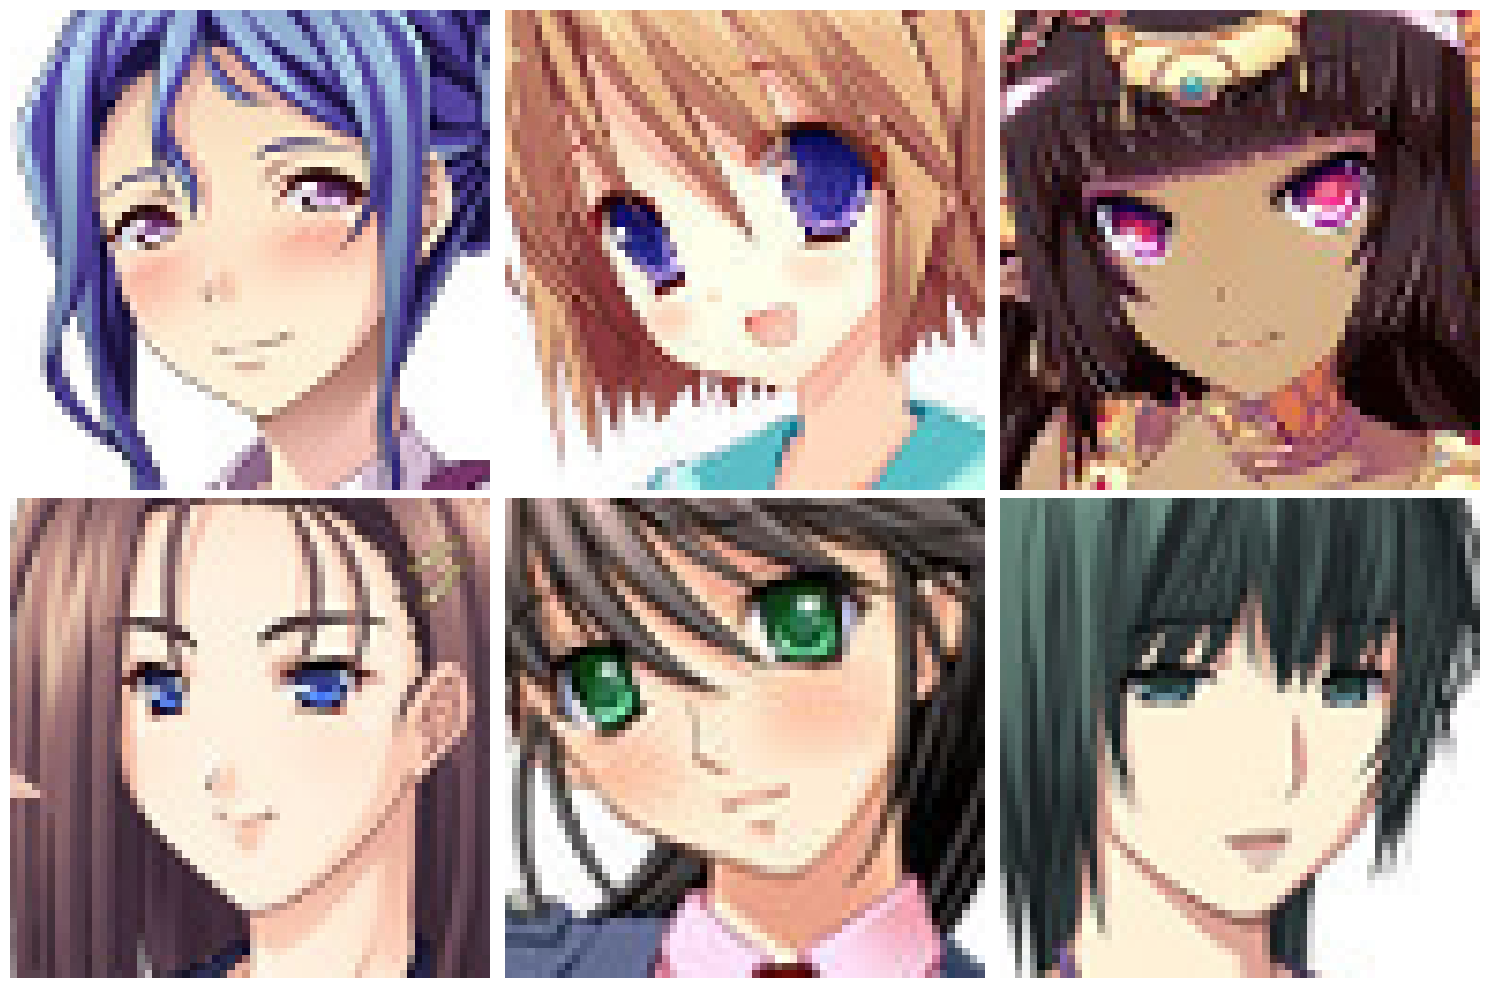

Extracting features using MobileNetV2...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 390ms/step
Performing PCA...
Performing t-SNE...
Clustering...
Visualizing clusters:


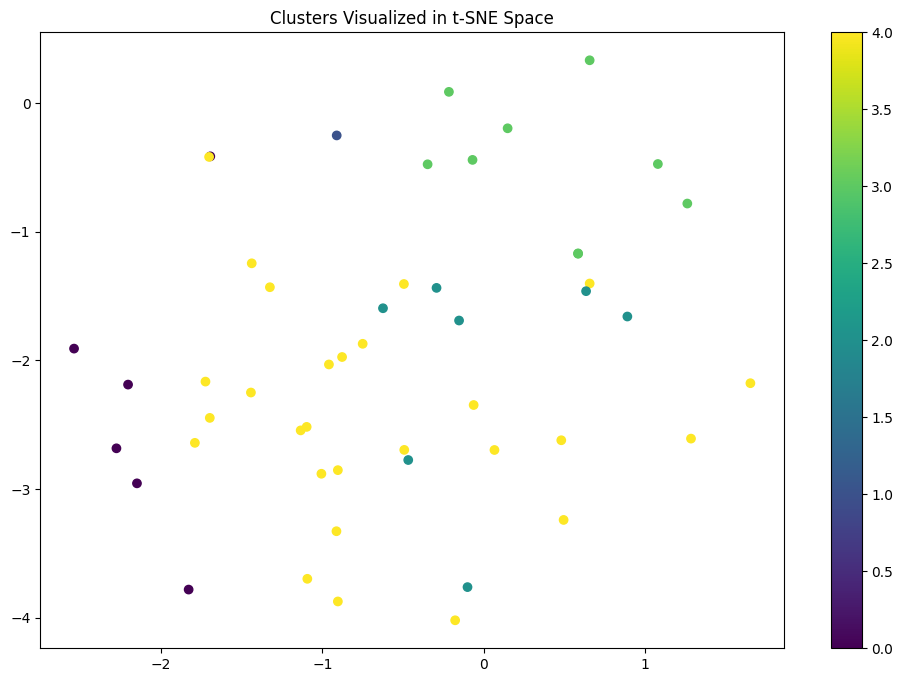

The average silhouette score is: 0.0279

## Examining 5 Clusters ##
Cluster sizes: [6, 1, 7, 9, 27]


In [12]:
silhouette_scores = []
for size in [50, 500, 1000]:
    score = process_dataset(size)
    silhouette_scores.append(score)

# Compare silhoutte scores

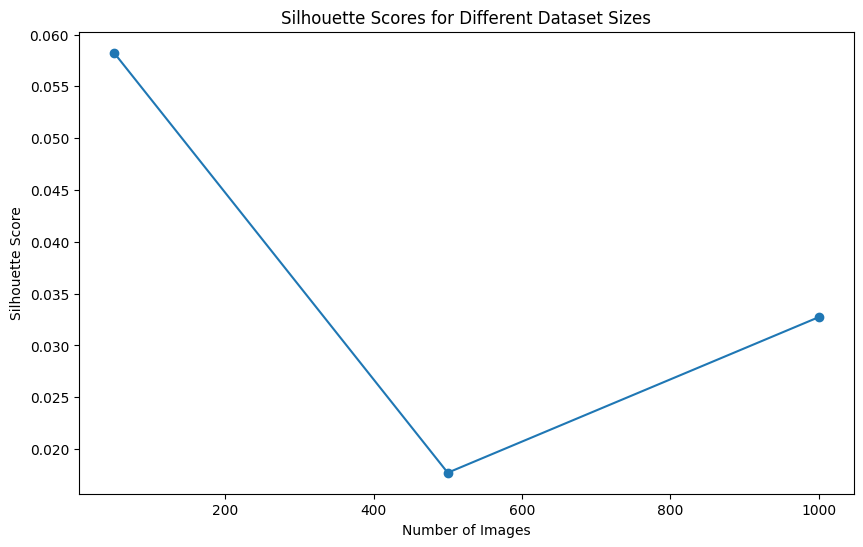

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot([50, 500, 1000], silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Dataset Sizes')
plt.xlabel('Number of Images')
plt.ylabel('Silhouette Score')
plt.show()

Here's a summary of what I did in this exercise:

I loaded the pre-trained MobileNetV2 model and used it to extract high-level features from the anime character images.

I processed three different dataset sizes: 50, 500, and 1000 images, to compare how the number of images affects clustering results.

For each dataset, I extracted features using MobileNetV2, performed dimensionality reduction using PCA and t-SNE, and then applied K-means clustering.
I visualized the clustering results using t-SNE plots and calculated silhouette scores to evaluate clustering quality.

Finally, I compared the silhouette scores across different dataset sizes to understand how the number of images impacts clustering performance.
